In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
import scipy
# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.TreeRing import TreeRing

%matplotlib inline 

Using TensorFlow backend.


In [2]:
config = TreeRing.BalloonConfig()
BALLOON_DIR = os.path.join(ROOT_DIR, "datasets/treering")

In [3]:
# Load dataset
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases
dataset = TreeRing.BalloonDataset()
dataset.load_balloon(BALLOON_DIR,"train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 2
Class Count: 2
  0. BG                                                
  1. ring                                              


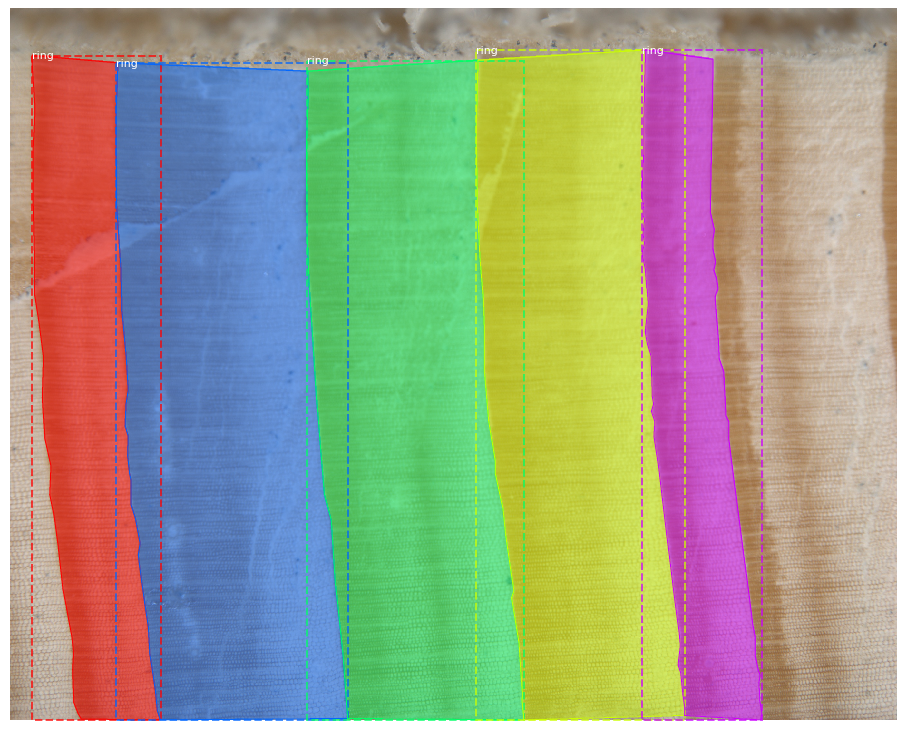

In [4]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)

# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and instances
visualize.display_instances(image,bbox, mask, class_ids, dataset.class_names)

In [6]:
from samples.TreeRing import MeasureRings
widths, sem, angles = MeasureRings.measure_all_rings(mask)
print(widths, sem, angles)

[256.5149860621913, 589.5934807649423, 532.3873927300193, 505.6809737168586, 222.07009676628041] [0.24213829920871563, 0.23624761981635942, 0.12669883709987498, 0.20326182283735558, 0.19914178827473744] [3.7058359163521817, 3.5280559466126493, 4.051815293583358, 3.4291438773657754, 4.371176955682121]
